In [1]:
pip install pandas
pip install matplotlib
pip install datetime
pip install numpy

SyntaxError: invalid syntax (1912383932.py, line 1)

In [2]:
import pandas as pd
import os 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

Task #1: Merge the 12 months of sales data into a single CSV file

In [3]:
df = pd.read_csv("/Users/dangt/Desktop/Python/Sale Data/Sales_January_2019.csv")

files =[file for file in os.listdir('/Users/dangt/Desktop/Python/Sale Data')]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("/Users/dangt/Desktop/Python/Sale Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)

Read in Updated Dataframe

In [4]:
all_data = pd.read_csv("/Users/dangt/Desktop/Python/Sale Data/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the Data!

Drop Rows of NaN

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.drop_duplicates(subset= 'Order ID')
all_data=all_data.dropna()

all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/2019 0:18,"250 Meadow St, San Francisco, CA 94016"


Convert Columns to the correct Type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors ='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'],errors ='coerce')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700.00,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700.00,09/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1.0,11.95,09/30/2019 0:18,"250 Meadow St, San Francisco, CA 94016"


Augment data with additional columns

Task 1: Add a Sales Column 

In [7]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1.0,700.00,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1.0,700.00,09/23/2019 7:39,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",379.99
186849,259357,USB-C Charging Cable,1.0,11.95,09/30/2019 0:18,"250 Meadow St, San Francisco, CA 94016",11.95


Task 2: Add a city column

In [240]:
#let's use apply()
all_data['City']=all_data['Purchase Address'].str.split(',').str[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles
6,176562,USB-C Charging Cable,1.0,11.95,04/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,San Francisco


Task 3: Add month Column

In [242]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,Dallas,4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston,4
3,176560,Google Phone,1.0,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,4
5,176561,Wired Headphones,1.0,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,4
6,176562,USB-C Charging Cable,1.0,11.95,04/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,San Francisco,4


Question 1: What was the best month for sales? How much was earned that month?

In [253]:
results=all_data.groupby('Month').sum()



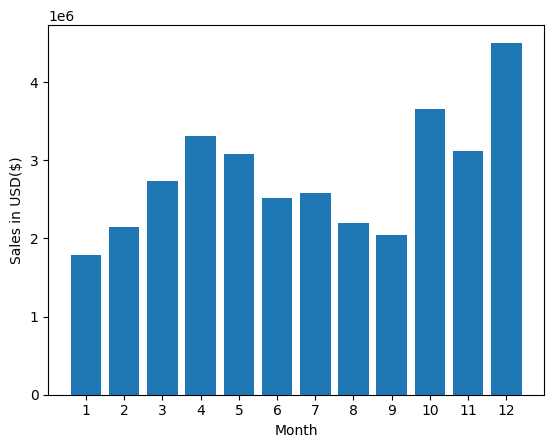

In [256]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month')
plt.show()


Question 2: What city sold the most products?

In [257]:
result = all_data.groupby('City').sum()

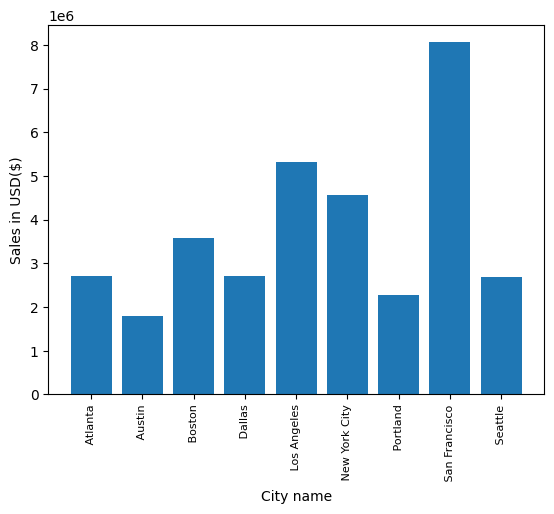

In [258]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
plt.show()


Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [259]:
all_data['Hour']=pd.DatetimeIndex(all_data['Order Date']).hour
all_data['Minute'] =pd.DatetimeIndex(all_data['Order Date']).minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Month,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,Dallas,4,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston,4,22,30
3,176560,Google Phone,1.0,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,4,14,38
5,176561,Wired Headphones,1.0,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,4,9,27
6,176562,USB-C Charging Cable,1.0,11.95,04/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,San Francisco,4,13,3


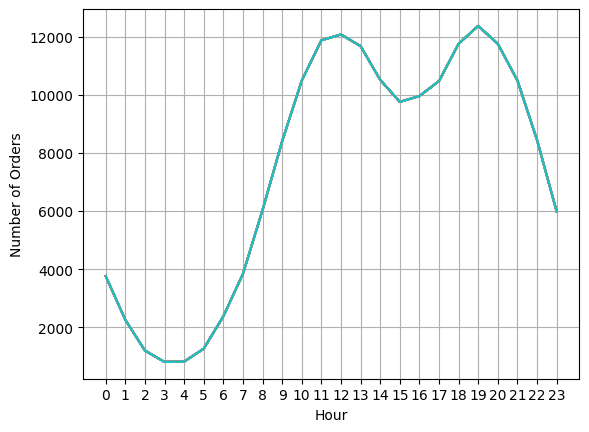

In [260]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


Question 4: What products are most often sold together?

In [266]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] =df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df =df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped


In [267]:
df=df[df['Grouped'].notnull()]
df.head()

,Order ID,Grouped


In [264]:

from itertools import combinations
from collections import Counter
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key,value)


Question 5: What products sold the most? 

In [265]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Month,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,04/19/2019 8:46,"917 1st St, Dallas, TX 75001",23.90,Dallas,4,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston,4,22,30
3,176560,Google Phone,1.0,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,4,14,38
5,176561,Wired Headphones,1.0,11.99,04/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,4,9,27
6,176562,USB-C Charging Cable,1.0,11.95,04/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,San Francisco,4,13,3


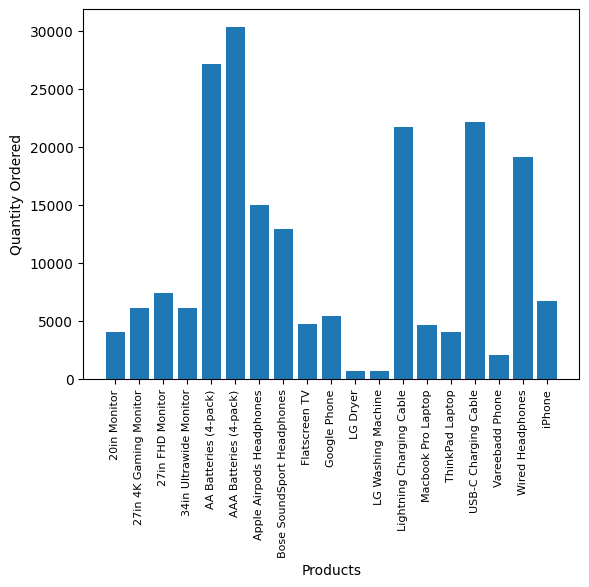

In [274]:
product_group=all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products =[product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size =8)
plt.show()